# Multi Task Lasso for HAR Datasets

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import read_table
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import MultiTaskLasso

filename = 'features.txt'
y_label='activity'
dataframe = read_table(filename, delim_whitespace=True,names=['id', 'feature_name'])
activity_map = {str(row.id):row.label_name for i, row in read_table('activity_labels.txt',delim_whitespace=True, names=['id', 'label_name']).iterrows()}
train_data_x = read_table('train/X_train.txt', delim_whitespace=True, names=dataframe.feature_name.tolist())
train_data_y = read_table('train/y_train.txt', delim_whitespace=True, names=[y_label])
train_data_y[y_label] = train_data_y[y_label].apply(lambda x: activity_map[str(x)])
train_data = pd.concat([train_data_y, train_data_x], axis=1)
test_data_x = read_table('test/X_test.txt', delim_whitespace=True, names=dataframe.feature_name.tolist())
test_data_y = read_table('test/y_test.txt', delim_whitespace=True, names=[y_label])
test_data_y[y_label] = test_data_y[y_label].apply(lambda x: activity_map[str(x)])
test_data= pd.concat([test_data_y,test_data_x], axis=1)
array=train_data.values
X=array[:,1:10]
Y=array[:,10:15]


/home/gautam/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py:709: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


# For Train datasets

In [3]:
kfold = KFold(n_splits=10,random_state=7)
scoring='neg_mean_squared_error'
model=MultiTaskLasso(alpha=0.5)
results=cross_val_score(model,X,Y,cv=kfold,scoring=scoring)

In [4]:
print(results)

[-0.12350858 -0.16634211 -0.14993315 -0.16811595 -0.1192146  -0.16502058
 -0.16881262 -0.10675323 -0.12036074 -0.14180239]


In [5]:
print(results.mean())

-0.14298639431609209


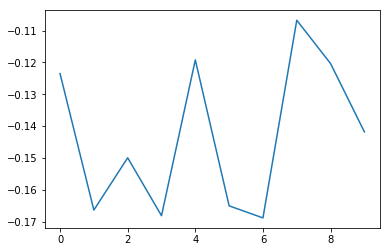

In [6]:
plt.plot(results)

# For test datasets 

In [7]:
array=test_data.values
X=array[:,1:10]
Y=array[:,10:15]
kfold = KFold(n_splits=10,random_state=7)
scoring='neg_mean_squared_error'
model=MultiTaskLasso(alpha=0.5)
results=cross_val_score(model,X,Y,cv=kfold,scoring=scoring)

In [8]:
print(results)

[-0.14045935 -0.10583748 -0.11477114 -0.17355374 -0.12443775 -0.12008724
 -0.11260988 -0.11033319 -0.16730713 -0.10404319]


In [9]:
print(results.mean())

-0.12734401005418522


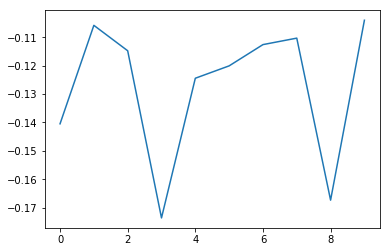

In [10]:
plt.plot(results)